https://stackabuse.com/gradient-boosting-classifiers-in-python-with-scikit-learn/

https://relopezbriega.github.io/blog/2017/06/10/boosting-en-machine-learning-con-python/

# Gradient Boosting

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier

**Importar los tres conjuntos de datos ya depurados**

In [2]:
train_data = pd.read_excel('./datosPractica/Datos_Train80.xlsx')
val_data = pd.read_excel('./datosPractica/Datos_Val20.xlsx')
eval_data = pd.read_excel('./datosPractica/Datos_Eval.xlsx')

In [3]:
train_data.head()

,sid,hour,termicSensation_origin,termicSensation_destination,transport_mode,distance,price,eta,min_distance,min_price,min_eta,binaryTarget,weekday_number,hora_punta,llovizna,is_train
1,1000014,17,49.65,49.65,6,6158,0,1857,5736,0,1454,0,0,1,0,True
2,1000063,15,58.75,58.92,1,6644,200,2988,6404,0,1362,1,0,0,0,True
3,1000063,15,58.75,58.92,3,6663,0,1362,6404,0,1362,0,0,0,0,True
4,1000068,12,53.62,53.54,1,9842,200,3037,6614,0,877,0,0,0,0,True
5,1000068,12,53.62,53.54,3,8496,0,877,6614,0,877,1,0,0,0,True


**Eliminar columnas añadidas de manera automática**

Al cargar los datos, vemos como se nos mete una columna identificadora `Unnamed: 0`, que no estaba en nuestro dataset depurado. No obstante, al haberlo guardado como Excel, automáticamente se ha generado. Por otro lado, para la realización de la partición de train y validación, se creó una columna que discriminaba observaciones de un conjunto train a otro de validación (`is_train`). Además, es necesario volver a eliminar la variable identificadora `sid`, puesto que se ha dejado en la exportación de los ficheros para tener la localización de cada observación. 

In [5]:
# Eliminar columna "Unnamed: 0"
# train_data.drop(labels="Unnamed: 0", axis=1, inplace=True)
# val_data.drop(labels="Unnamed: 0", axis=1, inplace=True)
# eval_data.drop(labels="Unnamed: 0", axis=1, inplace=True)

In [4]:
# Eliminar columna "is_train"
train_data.drop(labels="is_train", axis=1, inplace=True)
val_data.drop(labels="is_train", axis=1, inplace=True)

In [5]:
# Eliminar columna "sid"
train_data.drop(labels="sid", axis=1, inplace=True)
val_data.drop(labels="sid", axis=1, inplace=True)
eval_data.drop(labels="sid", axis=1, inplace=True)

**Separar los conjuntos de datos de la etiqueta o variable target**

In [6]:
# Cogemos la columna "binaryTarget"
y_train = train_data["binaryTarget"]
y_val = val_data["binaryTarget"]

# Eliminamos la columna "binaryTarget"
X_train = train_data.drop(labels="binaryTarget", axis=1, inplace=True)
X_val = val_data.drop(labels="binaryTarget", axis=1, inplace=True)

X_train = train_data
X_val = val_data

In [7]:
X_train.shape

(278530, 13)

In [8]:
X_train.head()

,hour,termicSensation_origin,termicSensation_destination,transport_mode,distance,price,eta,min_distance,min_price,min_eta,weekday_number,hora_punta,llovizna
1,17,49.65,49.65,6,6158,0,1857,5736,0,1454,0,1,0
2,15,58.75,58.92,1,6644,200,2988,6404,0,1362,0,0,0
3,15,58.75,58.92,3,6663,0,1362,6404,0,1362,0,0,0
4,12,53.62,53.54,1,9842,200,3037,6614,0,877,0,0,0
5,12,53.62,53.54,3,8496,0,877,6614,0,877,0,0,0


**Ajustamos un modelo _GradientBoostingClassifier_**

Árboles de decisión con Gradient boosting es uno de los modelos más poderosos y más utilizados para problemas de aprendizaje supervisado. Su principal inconveniente es que requieren un ajuste cuidadoso de los parámetros y puede requerir mucho tiempo de entrenamiento. Al igual que otros modelos basados en árboles, el algoritmo funciona y escala bien con una mezcla de características binarias y continuas. Asimismo, también arrastra el problema de los árboles de decisión en los casos en que los datos están dispersos y tienen una alta dimensionalidad. 

Los principales parámetros de los modelos de árboles de decisión con Gradient boosting son el número de árboles (`n_estimators`) y la tasa de aprendizaje (`learning_rate`), que controla el grado en que a cada árbol se le permite corregir los errores de los árboles anteriores. Estos dos parámetros están altamente interconectados en el sentido de que si bajamos el valor en la tasa de aprendizaje vamos a necesitar un número mayor de árboles para construir un modelo de complejidad similar.

- `learning_rate`: learning rate shrinks the contribution of each tree by learning_rate. There is a trade-off between learning_rate and n_estimators.
- `n_estimators`: The number of boosting stages to perform. Gradient boosting is fairly robust to over-fitting so a large number usually results in better performance.
- `max_depth`: maximum depth of the individual regression estimators. The maximum depth limits the number of nodes in the tree. Tune this parameter for best performance; the best value depends on the interaction of the input variables.
- `max_features`: The number of features to consider when looking for the best split. Choosing max_features < n_features leads to a reduction of variance and an increase in bias.
- `validation_fraction`: The proportion of training data to set aside as validation set for early stopping. Must be between 0 and 1.
- `random_state`: If int, random_state is the seed used by the random number generator; If RandomState instance, random_state is the random number generator; If None, the random number generator is the RandomState instance used by np.random.


https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html

> No se nos permite meter la validación nosotros, así que deberíamos de meter, un porcentaje de validación.

In [9]:
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in lr_list:
    # subir n_estimators a 750 sobreajusta
    # n_estimators=450 - max_depth=4
    gb_clf = GradientBoostingClassifier(n_estimators=450, learning_rate=learning_rate, 
                                        max_depth=4, validation_fraction=0.1, random_state=9)
    gb_clf.fit(X_train, y_train)

    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb_clf.score(X_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb_clf.score(X_val, y_val)))

Learning rate:  0.05
Accuracy score (training): 0.837
Accuracy score (validation): 0.830
Learning rate:  0.075
Accuracy score (training): 0.839
Accuracy score (validation): 0.830
Learning rate:  0.1
Accuracy score (training): 0.840
Accuracy score (validation): 0.830
Learning rate:  0.25
Accuracy score (training): 0.848
Accuracy score (validation): 0.830
Learning rate:  0.5
Accuracy score (training): 0.856
Accuracy score (validation): 0.825
Learning rate:  0.75
Accuracy score (training): 0.860
Accuracy score (validation): 0.821
Learning rate:  1
Accuracy score (training): 0.862
Accuracy score (validation): 0.819


Vemos cuál es el rendimiento para diferentes tasas de aprendizaje, y cogemos el mejor y el que menos sobreajuste de acuerdo a los dos conjuntos de datos que estamos probando. Y calculamos el accuracy, y el loss.

In [10]:
gb_clf2 = GradientBoostingClassifier(n_estimators=450, learning_rate=0.25, 
                                     max_depth=4, validation_fraction=0.1, random_state=9)
gb_clf2.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.25, loss='deviance', max_depth=4,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=450,
              n_iter_no_change=None, presort='auto', random_state=9,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [11]:
print("Accuracy score (validation): {0:.3f}".format(gb_clf2.score(X_val, y_val)))

Accuracy score (validation): 0.830


In [12]:
predictions = gb_clf2.predict(eval_data)
predictions

array([1, 0, 0, ..., 0, 0, 1])

In [40]:
print(gb_clf2.score(X_val, y_val))
import sklearn.metrics
print(sklearn.metrics.accuracy_score(y_val, predictions, normalize=True, sample_weight=None))

0.8299276776489496
0.8266416025714614


In [13]:
import collections, numpy

collections.Counter(predictions)

Counter({1: 26255, 0: 150535})

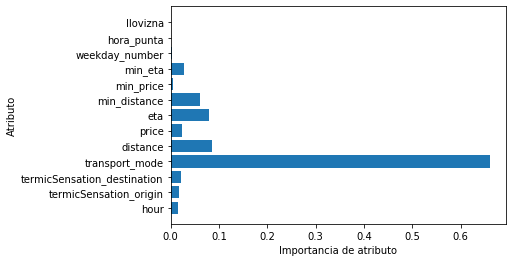

In [14]:
# Graficando la importancia de cada atributo
n_atributos = train_data.shape[1]
plt.barh(range(n_atributos), gb_clf2.feature_importances_, align='center')
plt.yticks(np.arange(n_atributos), train_data.columns)
plt.xlabel("Importancia de atributo")
plt.ylabel("Atributo")
plt.show();

In [33]:
# Para ver la matriz de confusión

predictions = gb_clf2.predict(X_val)

print("Classification Report")
print(classification_report(y_val, predictions))
print()
print("Confusion Matrix:")
pd.DataFrame(confusion_matrix(y_val, predictions))

Classification Report
              precision    recall  f1-score   support

           0       0.86      0.94      0.90     54679
           1       0.66      0.43      0.52     15009

   micro avg       0.83      0.83      0.83     69688
   macro avg       0.76      0.68      0.71     69688
weighted avg       0.82      0.83      0.82     69688


Confusion Matrix:


,0,1
0,51428,3251
1,8601,6408


--------------------------

# XGBoost

In [20]:
#!pip install xgboost
#!pip install xgboost==0.71

from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

XGBoost significa eXtreme Gradient Boosting. Es el algoritmo que ha estado dominando recientemente los problemas Machine learning y las competiciones de Kaggle con datos estructurados o tabulares. XGBoost es una implementación de árboles de decisión con Gradient boosting diseñada para minimizar la velocidad de ejecución y maximizar el rendimiento.

Internamente, XGBoost representa todos los problemas como un caso de modelado predictivo de regresión que sólo toma valores numéricos como entrada. Si nuestros datos están en un formato diferente, primero vamos a tener que transformarlos para poder hacer uso de todo el poder de esta librería. El hecho de trabajar sólo con datos numéricos es lo que hace que esta librería sea tan eficiente.

> Imposible hacer el OneHotEncoder, el kernel de mi ordenador se muere, porque hace como uso de la idea de regresión logística, por lo que puede que no hayemos la eficacia con este algoritmo, que a priori es mejor.

In [21]:
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in lr_list:
    xgb_clf = XGBClassifier(learning_rate=learning_rate, n_estimators=450, max_depth=4, seed=9)
    xgb_clf.fit(X_train, y_train)

    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(xgb_clf.score(X_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(xgb_clf.score(X_val, y_val)))

Learning rate:  0.05
Accuracy score (training): 0.835
Accuracy score (validation): 0.828
Learning rate:  0.075
Accuracy score (training): 0.837
Accuracy score (validation): 0.829
Learning rate:  0.1
Accuracy score (training): 0.839
Accuracy score (validation): 0.830
Learning rate:  0.25
Accuracy score (training): 0.844
Accuracy score (validation): 0.831
Learning rate:  0.5
Accuracy score (training): 0.852
Accuracy score (validation): 0.828
Learning rate:  0.75
Accuracy score (training): 0.857
Accuracy score (validation): 0.825
Learning rate:  1
Accuracy score (training): 0.859
Accuracy score (validation): 0.821


In [22]:
#xgb_clf = XGBClassifier(learning_rate=0.7, n_estimators=800, max_depth=5)
xgb_clf = XGBClassifier(learning_rate=0.7, n_estimators=850, max_depth=3)
xgb_clf.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.7, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=850,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [23]:
print("Accuracy score (training): {0:.3f}".format(xgb_clf.score(X_train, y_train)))
print("Accuracy score (validation): {0:.3f}".format(xgb_clf.score(X_val, y_val)))

Accuracy score (training): 0.851
Accuracy score (validation): 0.827


In [24]:
# Realizo las predicciones
y_pred = xgb_clf.predict(eval_data)
predicciones = [round(value) for value in y_pred]

In [25]:
import collections, numpy

collections.Counter(predicciones)

Counter({1: 26863, 0: 149927})

In [34]:
# Para ver la matriz de confusión

predictions = xgb_clf.predict(X_val)

print("Classification Report")
print(classification_report(y_val, predictions))
print()
print("Confusion Matrix:")
pd.DataFrame(confusion_matrix(y_val, predictions))

Classification Report
              precision    recall  f1-score   support

           0       0.86      0.94      0.89     54679
           1       0.65      0.43      0.52     15009

   micro avg       0.83      0.83      0.83     69688
   macro avg       0.75      0.68      0.70     69688
weighted avg       0.81      0.83      0.81     69688


Confusion Matrix:


,0,1
0,51181,3498
1,8583,6426
